In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/sunnypark1026/sunnypark/master/Data_Analysis/datasets/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# dataset info
# there are null values in Age, Cabin, 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Remove Null Values

In [10]:
titanic_df['Age'].fillna(np.mean(titanic_df['Age']), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)

In [12]:
# no null values
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [21]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

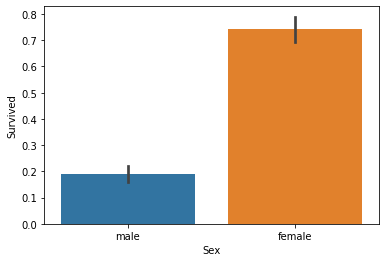

In [24]:
sns.barplot(data = titanic_df, x = 'Sex', y = 'Survived')

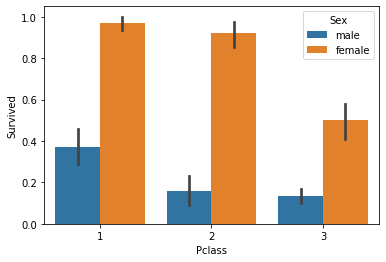

In [25]:
sns.barplot(data = titanic_df, x = 'Pclass', y = 'Survived', hue = 'Sex')

In [31]:
# Create a function to get specific values according to age
def get_category(age):
    if age <= -1: catg = 'Unknown'
    elif age <= 5: catg = 'Baby'
    elif age <= 12: catg = 'Child'
    elif age <= 18: catg = 'Teenager'
    elif age <= 25: catg = 'Student'
    elif age <= 35: catg = 'Young Adult'
    elif age <= 60: catg = 'Adult'
    else: catg = 'Elderly'
        
    return catg

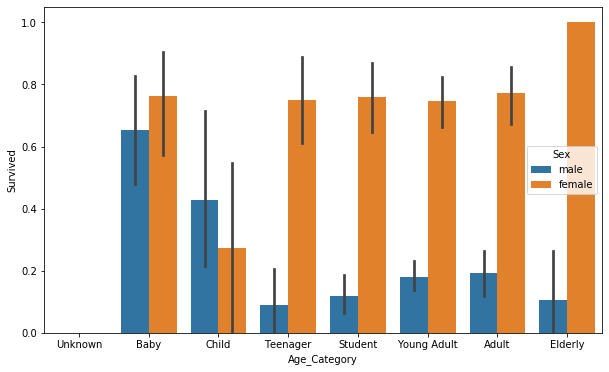

In [32]:
plt.figure(figsize = (10,6))

# create a list to show x axis in order
group_names = ['Unknown','Baby','Child','Teenager','Student',
               'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_Category'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(data = titanic_df, x = 'Age_Category', y = 'Survived', hue = 'Sex',
           order = group_names)

In [33]:
del titanic_df['Age_Category']
del titanic_df['Ticket']
del titanic_df['Name']

In [34]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,N,S
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,N,S
3,4,1,1,female,35.0,1,0,53.1000,C,S
4,5,0,3,male,35.0,0,0,8.0500,N,S


## Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

# create a function to encode categorical data
def encode_features(data_df):
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(data_df[feature])
        data_df[feature] = le.transform(data_df[feature])
    return data_df

In [36]:
encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,7,3
1,2,1,1,0,38.0,1,0,71.2833,2,0
2,3,1,3,0,26.0,0,0,7.9250,7,3
3,4,1,1,0,35.0,1,0,53.1000,2,3
4,5,0,3,1,35.0,0,0,8.0500,7,3


## Create some functions for showing all process above

In [37]:
# preprocessing - fillna function
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    return df
    
# preprocessing - deleting useless columns
def delete_column(df):
    df.drop('Ticket', axis = 1, inplace = True)
    df.drop('Name', axis = 1, inplace = True)
    return df
    
# encoding 
def encoding(df):
    features = ['Sex','Cabin','Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# last function including all 3 functions above
def transform_features(df):
    df = fillna(df)
    df = delete_column(df)
    df = encoding(df)
    return df

In [39]:
# load titanic df dataset again
titanic_df = pd.read_csv('https://raw.githubusercontent.com/sunnypark1026/sunnypark/master/Data_Analysis/datasets/titanic_train.csv')
titanic_df.head(3)
transform_features(titanic_df)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,146,3
1,2,1,1,0,38.000000,1,0,71.2833,81,0
2,3,1,3,0,26.000000,0,0,7.9250,146,3
3,4,1,1,0,35.000000,1,0,53.1000,55,3
4,5,0,3,1,35.000000,0,0,8.0500,146,3
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,146,3
887,888,1,1,0,19.000000,0,0,30.0000,30,3
888,889,0,3,0,29.699118,1,2,23.4500,146,3
889,890,1,1,1,26.000000,0,0,30.0000,60,0


## Train/Test dataset

In [47]:
from sklearn.model_selection import train_test_split
X = titanic_df.drop('Survived', axis = 1)
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 28)

## Building Models

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [68]:
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(random_state = 11)

In [69]:
# DecisionTree Classifier
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTree Classifier accuracy score: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForest Classifier
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForest Classifier accuracy score: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))


# Logistic Regression
lr_clf.fit(X_train, y_train)
lr_pred = lr_reg.predict(X_test)
print('Logistic Regression accuracy score: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTree Classifier accuracy score: 0.7374
RandomForest Classifier accuracy score: 0.8436
Logistic Regression accuracy score: 0.7933


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Evaluation with cross_val_score

In [70]:
from sklearn.model_selection import cross_val_score

In [95]:
clfs = dt_clf, rf_clf, lr_clf
scores_list = []
for i, clfs_ in enumerate(clfs):
    scores = cross_val_score(clfs_, X, y,
                            scoring = 'accuracy', cv = 5)
    print('{0}) {1} cross_val_score: {2:.4f}'.format(i+1, type(clfs_), np.mean(scores)))

1) <class 'sklearn.tree.tree.DecisionTreeClassifier'> cross_val_score: 0.7623
2) <class 'sklearn.ensemble.forest.RandomForestClassifier'> cross_val_score: 0.7970
3) <class 'sklearn.linear_model.logistic.LogisticRegression'> cross_val_score: 0.7969


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t